# 无约束问题的求解

## 粒子群

第0次最佳适应值为147101.58600554743
第10次最佳适应值为62.6343819700929
第20次最佳适应值为6.143677884181232
第30次最佳适应值为2.577108987990544
第40次最佳适应值为1.6329740872439058
第50次最佳适应值为1.6197088569083802
第60次最佳适应值为1.6049533180064033
第70次最佳适应值为1.591054643239364
第80次最佳适应值为1.5909267340803859
第90次最佳适应值为1.5889130711146153
第100次最佳适应值为1.5883509464387404
第110次最佳适应值为1.5883509464387404
第120次最佳适应值为1.5883509464387404
第130次最佳适应值为1.5871659652097385
第140次最佳适应值为1.5871659652097385
第150次最佳适应值为1.584620205705536
第160次最佳适应值为1.584620205705536
第170次最佳适应值为1.584620205705536
第180次最佳适应值为1.584595802734042
第190次最佳适应值为1.584595802734042
最优位置:[[1.20992352 1.46568749 2.14995616 4.62487104]]
最优解:1.584595802734042


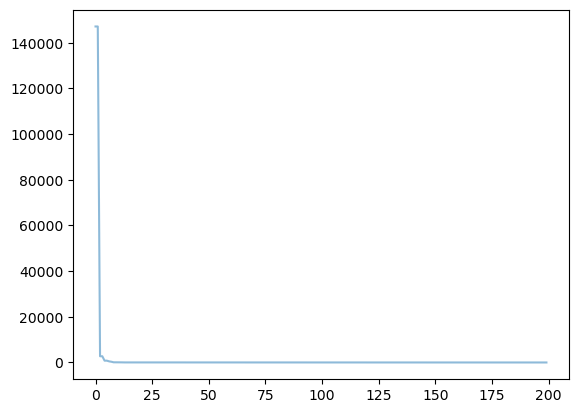

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def fit_fun(x):  # 适应函数
    return sum(100.0 * (x[0][1:] - x[0][:-1] ** 2.0) ** 2.0 + (1 - x[0][:-1]) ** 2.0)


class Particle:
    # 初始化
    def __init__(self, x_max, max_vel, dim):
        self.__pos = np.random.uniform(-x_max, x_max, (1, dim))  # 粒子的位置
        self.__vel = np.random.uniform(-max_vel, max_vel, (1, dim))  # 粒子的速度
        self.__bestPos = np.zeros((1, dim))  # 粒子最好的位置
        self.__fitnessValue = fit_fun(self.__pos)  # 适应度函数值

    def set_pos(self, value):
        self.__pos = value

    def get_pos(self):
        return self.__pos

    def set_best_pos(self, value):
        self.__bestPos = value

    def get_best_pos(self):
        return self.__bestPos

    def set_vel(self, value):
        self.__vel = value

    def get_vel(self):
        return self.__vel

    def set_fitness_value(self, value):
        self.__fitnessValue = value

    def get_fitness_value(self):
        return self.__fitnessValue


class PSO:
    def __init__(self, dim, size, iter_num, x_max, max_vel, tol, best_fitness_value=float('Inf'), C1=2, C2=2, W=1):
        self.C1 = C1
        self.C2 = C2
        self.W = W
        self.dim = dim  # 粒子的维度
        self.size = size  # 粒子个数
        self.iter_num = iter_num  # 迭代次数
        self.x_max = x_max
        self.max_vel = max_vel  # 粒子最大速度
        self.tol = tol  # 截至条件
        self.best_fitness_value = best_fitness_value
        self.best_position = np.zeros((1, dim))  # 种群最优位置
        self.fitness_val_list = []  # 每次迭代最优适应值
        self.numm = 0

        # 对种群进行初始化
        self.Particle_list = [Particle(self.x_max, self.max_vel, self.dim) for i in range(self.size)]

    def set_bestFitnessValue(self, value):
        self.best_fitness_value = value

    def get_bestFitnessValue(self):
        return self.best_fitness_value

    def set_bestPosition(self, value):
        self.best_position = value

    def get_bestPosition(self):
        return self.best_position

    # 更新速度
    def update_vel(self, part):
        vel_value = self.W * part.get_vel() + self.C1 * np.random.rand() * (part.get_best_pos() - part.get_pos()) \
                    + self.C2 * np.random.rand() * (self.get_bestPosition() - part.get_pos())
        vel_value[vel_value > self.max_vel] = self.max_vel
        vel_value[vel_value < -self.max_vel] = -self.max_vel
        part.set_vel(vel_value)

    # 更新位置
    def update_pos(self, part):
        pos_value = part.get_pos() + part.get_vel()
        part.set_pos(pos_value)
        value = fit_fun(part.get_pos())
        if value < part.get_fitness_value():
            part.set_fitness_value(value)
            part.set_best_pos(pos_value)
        if value < self.get_bestFitnessValue():
            self.set_bestFitnessValue(value)
            self.set_bestPosition(pos_value)

    def update_ndim(self):

        for i in range(self.iter_num):
            for part in self.Particle_list:
                self.update_vel(part)  # 更新速度
                self.update_pos(part)  # 更新位置
            self.fitness_val_list.append(self.get_bestFitnessValue())  # 每次迭代完把当前的最优适应度存到列表
            if i % 10 == 0:
                print('第{}次最佳适应值为{}'.format(i, self.get_bestFitnessValue()))
            if i >= 2:
                if abs(self.fitness_val_list[i-1] - self.fitness_val_list[i-2]) < self.tol:
                    self.numm += 1
                    if self.numm > 50:
                        break

                else:
                    self.numm = 0

            else:
                self.numm = 0

        return self.fitness_val_list, self.get_bestPosition()

if __name__ == '__main__':
    # test 香蕉函数
    dim=4  # 粒子的维度
    size=5000  # 粒子个数
    iter_num=1000  # 迭代次数
    x_max=300  #粒子在搜索空间中可以移动的最大范围
    max_vel=60   # 粒子最大速度
    tol=1e-4  #收敛条件
    pso = PSO(dim, size, iter_num, x_max, max_vel, tol, C1=2, C2=2, W=1)
    fit_var_list, best_pos = pso.update_ndim()
    print("最优位置:" + str(best_pos))
    print("最优解:" + str(fit_var_list[-1]))
    plt.plot(range(len(fit_var_list)), fit_var_list, alpha=0.5)

## 遗传算法

In [2]:
# 遗传算法
import numpy as np
from numpy.ma import cos
import matplotlib.pyplot as plt
from matplotlib import cm
import datetime


def getfitness(pop):  # 适应度函数
    x, y = decodeDNA(pop)
    temp = F(x, y)
    return (temp-np.min(temp))+0.0001
 
 
def decodeDNA(pop):  # 二进制转坐标，解码
    x_pop = pop[:, 1::2]
    y_pop = pop[:, ::2]
    # .dot()用于矩阵相乘
    x = x_pop.dot(2**np.arange(DNA_SIZE)[::-1])/float(2**DNA_SIZE-1)*(X_BOUND[1]-X_BOUND[0])+X_BOUND[0]
    y = y_pop.dot(2**np.arange(DNA_SIZE)[::-1])/float(2**DNA_SIZE-1)*(Y_BOUND[1]-Y_BOUND[0])+Y_BOUND[0]
    return x, y
 
 
def select(pop, fitness):  # 选择
    temp = np.random.choice(np.arange(POP_SIZE), size=POP_SIZE, replace=True, p=fitness/(fitness.sum()))
    return pop[temp]
 
def mutation(temp, MUTA_RATE):  # 变异
    if np.random.rand() < MUTA_RATE:
        mutate_point = np.random.randint(0, DNA_SIZE)
        temp[mutate_point] = temp[mutate_point] ^ 1   # ^为异或运算
 
 
def crossmuta(pop, CROSS_RATE):  # 交叉
    new_pop = []
    for i in pop:
        temp = i
        if np.random.rand()<CROSS_RATE:
            j = pop[np.random.randint(POP_SIZE)]
            cpoints1 = np.random.randint(0, DNA_SIZE*2-1)
            cpoints2 = np.random.randint(cpoints1, DNA_SIZE*2)
            temp[cpoints1:cpoints2] = j[cpoints1:cpoints2]
            mutation(temp, MUTA_RATE)
        new_pop.append(temp)
    return new_pop

def print_info(pop):  # 输出最优解等
    fitness = getfitness(pop)
    maxfitness = np.argmax(fitness)
    print("max_fitness", fitness[maxfitness])
    x, y = decodeDNA(pop)
    print("最优的基因型:", pop[maxfitness])
    print("(x,y):", (x[maxfitness], y[maxfitness]))
    print("F(x,y)_max=", F(x[maxfitness], y[maxfitness]))


def F(x, y):  # 函数
    return (6.452*(x+0.125*y)*(cos(x)-cos(2*y))**2)/(0.8+(x-4.2)**2+2*(y-7)**2)+3.226*y
    

DNA_SIZE = 24  # 编码长度
POP_SIZE = 10000  # 种群大小
CROSS_RATE = 0.5  # 交叉率
MUTA_RATE = 0.15  # 变异率
Iterations = 50  # 迭代次数
X_BOUND = [0, 100]  # X区间
Y_BOUND = [0, 100]  # Y区间

 
if __name__=="__main__":  # 主函数
    pop = np.random.randint(2, size=(POP_SIZE, DNA_SIZE*2))
    start_t = datetime.datetime.now()
    for i in range(Iterations):
        x, y = decodeDNA(pop)                                        # 二进制转坐标，解码
        pop = np.array(crossmuta(pop, CROSS_RATE))                   # 交叉
        fitness = getfitness(pop)                                    #计算适应度
        print("第", i, "趟最优值：", F(x[np.argmax(fitness)], y[np.argmax(fitness)]))     #最优解
        pop = select(pop, fitness)
    end_t = datetime.datetime.now()
    print((end_t-start_t).seconds)
    print_info(pop)

第 0 趟最优值： 322.62060599624294
第 1 趟最优值： 322.6206097326792
第 2 趟最优值： 320.2557755375228
第 3 趟最优值： 322.616752916796
第 4 趟最优值： 322.5760187886159
第 5 趟最优值： 287.94512640971385
第 6 趟最优值： 313.9302674449477
第 7 趟最优值： 302.43453100389564
第 8 趟最优值： 320.7052449033656
第 9 趟最优值： 315.65777248954186
第 10 趟最优值： 322.64998561721427
第 11 趟最优值： 322.64998561721427
第 12 趟最优值： 322.64998561721427
第 13 趟最优值： 310.42033253119183
第 14 趟最优值： 322.6499663626993
第 15 趟最优值： 322.6528059763542
第 16 趟最优值： 322.6528059763542
第 17 趟最优值： 322.6528059763542
第 18 趟最优值： 322.65249347836
第 19 趟最优值： 322.65249347836
第 20 趟最优值： 322.65036819368146
第 21 趟最优值： 322.64999020739657
第 22 趟最优值： 322.6493863497455
第 23 趟最优值： 322.64866499888103
第 24 趟最优值： 318.6946408223092
第 25 趟最优值： 322.65980056442214
第 26 趟最优值： 322.65980056442214
第 27 趟最优值： 322.65980056442214
第 28 趟最优值： 322.65980056442214
第 29 趟最优值： 322.65595660489646
第 30 趟最优值： 322.64016064755657
第 31 趟最优值： 322.6356974165423
第 32 趟最优值： 322.6360156893695
第 33 趟最优值： 322.6360156893695
第 34 趟最优值： 3

## 机器学习参数优化方法

In [25]:
# 贝叶斯优化
#基本工具
import numpy as np
import pandas as pd
import time
import os #修改环境设置

#算法/损失/评估指标等
import sklearn
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import KFold, cross_validate

#优化器
from bayes_opt import BayesianOptimization

import hyperopt
from hyperopt import hp, fmin, tpe, Trials, partial
from hyperopt.early_stop import no_progress_loss

import optuna

#导入数据
df = pd.DataFrame({
    'Default': np.random.randint(0, 100, size=1000),
    'Column2': np.random.randn(1000),
    'Column3': np.random.randint(0, 100, size=1000),
    'Column4': np.random.randint(0, 100, size=1000)
})
#  提取特征和目标变量
X = df.drop(columns="Default")
y = df["Default"]


def bayesopt_objective(n_estimators,max_depth,max_features,min_impurity_decrease):
    
    #定义评估器
    #需要调整的超参数等于目标函数的输入，不需要调整的超参数则直接等于固定值
    #默认参数输入一定是浮点数，因此需要套上int函数处理成整数
    reg = RFR(n_estimators = int(n_estimators)
              ,max_depth = int(max_depth)
              ,max_features = int(max_features)
              ,min_impurity_decrease = min_impurity_decrease
              ,random_state=83
              ,verbose=False #可自行决定是否开启森林建树的verbose
              ,n_jobs=-1)
    
    #定义损失的输出，5折交叉验证下的结果，输出负根均方误差（-RMSE）
    #注意，交叉验证需要使用数据，但我们不能让数据X,y成为目标函数的输入
    cv = KFold(n_splits=5,shuffle=True,random_state=83)
    validation_loss = cross_validate(reg,X,y
                                     ,scoring="neg_root_mean_squared_error"
                                     ,cv=cv
                                     ,verbose=False
                                     ,n_jobs=-1
                                     ,error_score='raise'
                                     #如果交叉验证中的算法执行报错，则告诉我们错误的理由
                                    )
    
    #交叉验证输出的评估指标是负根均方误差，因此本来就是负的损失
    #目标函数可直接输出该损失的均值
    return np.mean(validation_loss["test_score"]) 

param_grid_simple = {'n_estimators': (80,100)
                     , 'max_depth':(10,25)
                     , "max_features": (10,20)
                     , "min_impurity_decrease":(0,1)
                    }

def param_bayes_opt(init_points,n_iter):
    
    #定义优化器，先实例化优化器
    opt = BayesianOptimization(bayesopt_objective #需要优化的目标函数
                               ,param_grid_simple #备选参数空间
                               ,random_state=83 #随机数种子，虽然无法控制住
                              )
    
    #使用优化器，记住bayes_opt只支持最大化
    opt.maximize(init_points = init_points #抽取多少个初始观测值
                 , n_iter=n_iter #一共观测/迭代多少次
                )
    
    #优化完成，取出最佳参数与最佳分数
    params_best = opt.max["params"]
    score_best = opt.max["target"]
    
    #打印最佳参数与最佳分数
    print("\n","\n","best params: ", params_best,
          "\n","\n","best cvscore: ", score_best)
    
    #返回最佳参数与最佳分数
    return params_best, score_best

# 即带入最优参数查看结果
def bayes_opt_validation(params_best):
    
    reg = RFR(n_estimators = int(params_best["n_estimators"]) 
              ,max_depth = int(params_best["max_depth"])
              ,max_features = int(params_best["max_features"])
              ,min_impurity_decrease = params_best["min_impurity_decrease"]
              ,random_state=83
              ,verbose=False
              ,n_jobs=-1)

    cv = KFold(n_splits=5,shuffle=True,random_state=83)
    validation_loss = cross_validate(reg,X,y
                                     ,scoring="neg_root_mean_squared_error"
                                     ,cv=cv
                                     ,verbose=False
                                     ,n_jobs=-1
                                    )
    return np.mean(validation_loss["test_score"])

start = time.time()
params_best, score_best = param_bayes_opt(20,280) #初始看20个观测值，后面迭代280次
print('It takes %s minutes' % ((time.time() - start) / 60))
validation_score = bayes_opt_validation(params_best)
print("\n","\n","validation_score: ",validation_score)


|   iter    |  target   | max_depth | max_fe... | min_im... | n_esti... |
-------------------------------------------------------------------------
| 1         | -30.87    | 13.86     | 16.84     | 0.6636    | 95.54     |
| 2         | -31.25    | 22.41     | 13.57     | 0.3867    | 94.87     |
| 3         | -31.01    | 14.24     | 12.94     | 0.574     | 80.94     |
| 4         | -31.01    | 15.81     | 18.35     | 0.5211    | 82.55     |
| 5         | -31.13    | 16.22     | 18.21     | 0.3446    | 98.32     |
| 6         | -30.8     | 12.81     | 10.27     | 0.2372    | 94.4      |
| 7         | -31.04    | 14.04     | 15.66     | 0.63      | 84.25     |
| 8         | -31.27    | 21.07     | 13.47     | 0.3249    | 86.34     |
| 9         | -31.26    | 24.57     | 11.15     | 0.3313    | 99.57     |
| 10        | -31.29    | 24.96     | 11.81     | 0.1392    | 94.21     |
| 11        | -31.17    | 19.85     | 16.11     | 0.4999    | 99.99     |
| 12        | -31.22    | 21.09     | 

In [3]:
# 可以研究一下划分的方式

# 规划问题

In [3]:
# 线性规划
from scipy.optimize import linprog

# 定义系数
c = [1, 2]  # 目标函数系数
A = [[-1, 1], [1, 2]]  # 不等式约束系数
b = [1, 2]  # 不等式约束右侧值

# 求解线性规划
res = linprog(c, A_ub=A, b_ub=b, method='highs')

if res.success:
    print(f'最优解：{res.x}')
    print(f'最优目标函数值：{res.fun}')
else:
    print('求解失败')


最优解：[0. 0.]
最优目标函数值：0.0


In [4]:
import pulp

# 创建问题实例
prob = pulp.LpProblem("Problem", pulp.LpMaximize)

# 定义变量
x = pulp.LpVariable('x', lowBound=0)  # 定义x为非负变量
y = pulp.LpVariable('y', lowBound=0)  # 定义y为非负变量

# 添加目标函数
prob += x + 2*y, "Z"

# 添加约束
prob += x - y <= 1
prob += x + 2*y <= 2

# 求解问题
prob.solve()

# 输出结果
for v in prob.variables():
    print(v.name, "=", v.varValue)


x = 0.0
y = 1.0


In [7]:
# 整数规划
import pulp

# 创建问题实例
prob = pulp.LpProblem("Problem", pulp.LpMaximize)

# 定义整数变量
x = pulp.LpVariable('x', lowBound=0, cat='Integer')  
y = pulp.LpVariable('y', lowBound=0, cat='Integer')  

# 添加目标函数和约束
prob += x + 2*y, "Z"

# 添加约束
prob += x - y <= 1
prob += x + 2*y <= 2

# 求解问题
prob.solve()

# 输出结果
for v in prob.variables():
    print(v.name, "=", v.varValue)


x = 0.0
y = 1.0


In [9]:
# 非线性规划
from scipy.optimize import minimize

# 定义目标函数
def objective(x):
    return x[0]**2 + x[1]**2

# 定义约束
cons = ({'type': 'eq', 'fun': lambda x:  x[0] + x[1] - 1})

# 定义变量的初始猜测
x0 = [0.1, 0.9]

# 求解非线性规划
res = minimize(objective, x0, constraints=cons)

print(res.x)


[0.5 0.5]


In [10]:
import cvxpy as cp

# 定义变量
x = cp.Variable(2)

# 定义目标函数
objective = cp.Minimize(x[0]**2 + x[1]**2)

# 定义约束
constraints = [x[0] + x[1] == 1]

# 定义问题
prob = cp.Problem(objective, constraints)

# 求解问题
prob.solve()

print(x.value)


[0.5 0.5]


# 带约束的智能算法求解

In [9]:
# 遗传算法
import numpy as np
from numpy.ma import cos
import matplotlib.pyplot as plt
from matplotlib import cm
import datetime


def getfitness(pop):  # 适应度函数
    x, y = decodeDNA(pop)
    temp = F(x, y)
    out = ST(pop)
    return ((temp-np.min(temp))+0.0001) * out

def constraint(x, y):
    # 示例约束条件：x + y > 10
    return x + y > 199

def ST(pop):
    x, y = decodeDNA(pop)
    # 约束条件
    satisfies_constraint = constraint(x, y)
    
    # 将布尔数组转换为整数数组，其中True转换为1，False转换为0
    result = satisfies_constraint.astype(int)
    
    return result
 
 
def decodeDNA(pop):  # 二进制转坐标，解码
    x_pop = pop[:, 1::2]
    y_pop = pop[:, ::2]
    # .dot()用于矩阵相乘
    x = x_pop.dot(2**np.arange(DNA_SIZE)[::-1])/float(2**DNA_SIZE-1)*(X_BOUND[1]-X_BOUND[0])+X_BOUND[0]
    y = y_pop.dot(2**np.arange(DNA_SIZE)[::-1])/float(2**DNA_SIZE-1)*(Y_BOUND[1]-Y_BOUND[0])+Y_BOUND[0]
    return x, y
 
 
def select(pop, fitness):  # 选择
    temp = np.random.choice(np.arange(POP_SIZE), size=POP_SIZE, replace=True, p=fitness/(fitness.sum()))
    return pop[temp]
 
def mutation(temp, MUTA_RATE):  # 变异
    if np.random.rand() < MUTA_RATE:
        mutate_point = np.random.randint(0, DNA_SIZE)
        temp[mutate_point] = temp[mutate_point] ^ 1   # ^为异或运算
 
 
def crossmuta(pop, CROSS_RATE):  # 交叉
    new_pop = []
    for i in pop:
        temp = i
        if np.random.rand()<CROSS_RATE:
            j = pop[np.random.randint(POP_SIZE)]
            cpoints1 = np.random.randint(0, DNA_SIZE*2-1)
            cpoints2 = np.random.randint(cpoints1, DNA_SIZE*2)
            temp[cpoints1:cpoints2] = j[cpoints1:cpoints2]
            mutation(temp, MUTA_RATE)
        new_pop.append(temp)
    return new_pop

def print_info(pop):  # 输出最优解等
    fitness = getfitness(pop)
    maxfitness = np.argmax(fitness)
    print("max_fitness", fitness[maxfitness])
    x, y = decodeDNA(pop)
    print("最优的基因型:", pop[maxfitness])
    print("(x,y):", (x[maxfitness], y[maxfitness]))
    print("F(x,y)_max=", F(x[maxfitness], y[maxfitness]))


def F(x, y):  # 函数
    return (6.452*(x+0.125*y)*(cos(x)-cos(2*y))**2)/(0.8+(x-4.2)**2+2*(y-7)**2)+3.226*y
    

DNA_SIZE = 24  # 编码长度
POP_SIZE = 10000  # 种群大小
CROSS_RATE = 0.5  # 交叉率
MUTA_RATE = 0.15  # 变异率
Iterations = 50  # 迭代次数
X_BOUND = [0, 100]  # X区间
Y_BOUND = [0, 100]  # Y区间

 
if __name__=="__main__":  # 主函数
    pop = np.random.randint(2, size=(POP_SIZE, DNA_SIZE*2))
    start_t = datetime.datetime.now()
    for i in range(Iterations):
        x, y = decodeDNA(pop)                                        # 二进制转坐标，解码
        pop = np.array(crossmuta(pop, CROSS_RATE))                   # 交叉
        fitness = getfitness(pop)                                    #计算适应度
        print("第", i, "趟最优值：", F(x[np.argmax(fitness)], y[np.argmax(fitness)]))     #最优解
        pop = select(pop, fitness)
    end_t = datetime.datetime.now()
    print((end_t-start_t).seconds)
    print_info(pop)

第 0 趟最优值： 321.4442462807022
第 1 趟最优值： 321.4442462807022
第 2 趟最优值： 322.05754132249984
第 3 趟最优值： 321.43717335108363
第 4 趟最优值： 321.4442462807022
第 5 趟最优值： 321.7498717128296
第 6 趟最优值： 322.36744399148597
第 7 趟最优值： 322.36744399148597
第 8 趟最优值： 322.36744399148597
第 9 趟最优值： 322.36744399148597
第 10 趟最优值： 322.05754132249984
第 11 趟最优值： 322.36744399148597
第 12 趟最优值： 322.36744399148597
第 13 趟最优值： 321.5968276973704
第 14 趟最优值： 322.36744399148597
第 15 趟最优值： 322.5232072884811
第 16 趟最优值： 322.5232072884811
第 17 趟最优值： 322.5232072884811
第 18 趟最优值： 322.5232072884811
第 19 趟最优值： 322.36744399148597
第 20 趟最优值： 322.4465395525125
第 21 趟最优值： 322.4465395525125
第 22 趟最优值： 322.4465395525125
第 23 趟最优值： 322.36744399148597
第 24 趟最优值： 322.52433901810633
第 25 趟最优值： 322.05754132249984
第 26 趟最优值： 322.5232072884811
第 27 趟最优值： 322.5232072884811
第 28 趟最优值： 321.14016450387885
第 29 趟最优值： 321.4442462807022
第 30 趟最优值： 322.52433901810633
第 31 趟最优值： 321.7498717128296
第 32 趟最优值： 322.6012769836292
第 33 趟最优值： 322.6012769836292
第 34 趟最优